In [53]:
import numpy as np
import pandas as pd

In [54]:
data=pd.read_csv("C:\\Users\\nikit\\Downloads\\kaggle_dataset\\penguins.csv")

In [55]:
#EDA(Exploatry Data Analysis)..

data.sample(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
108,38.1,17.0,181.0,3175.0,FEMALE
185,51.0,18.8,203.0,4100.0,MALE
241,45.1,14.5,215.0,5000.0,FEMALE
171,49.2,18.2,195.0,4400.0,MALE
217,49.6,18.2,193.0,3775.0,MALE


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [57]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [58]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [59]:
# handle missing values

data.dropna(inplace=True)
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

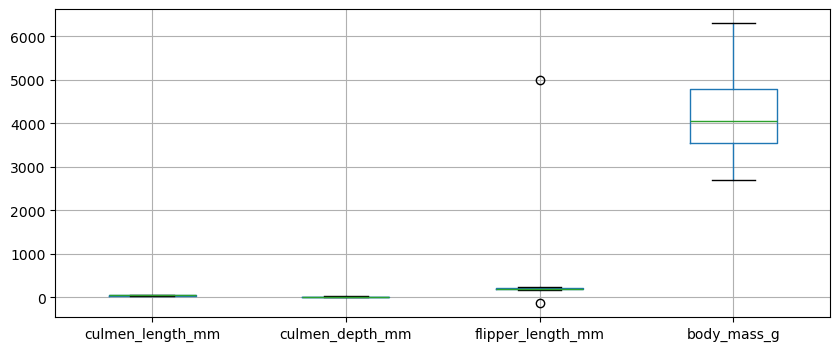

In [64]:
#now make boxplot for numerical columns to check for outliers

plt.figure(figsize=(10,4))
data.boxplot()
plt.show()

In [65]:
sum(data['flipper_length_mm']> 4000)

1

In [66]:
data['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [67]:
# drop the rows with wrong values
data = data[data['sex'] != '.']
data = data[data['flipper_length_mm'] >= 0]
data = data[data['flipper_length_mm'] < 4000]

In [68]:
# reset index
data.reset_index(drop=True, inplace=True)

In [69]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [70]:
data['sex'].value_counts()

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

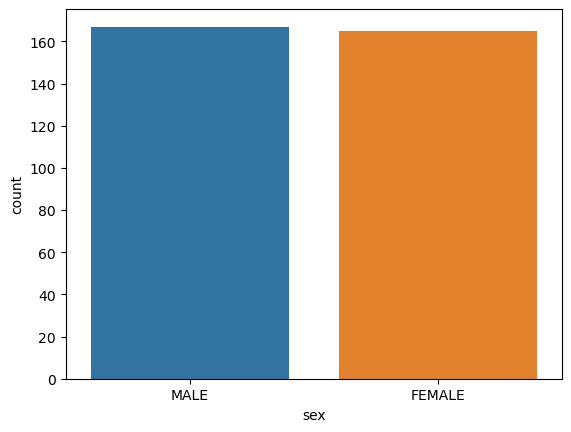

In [71]:
sns.countplot(x=data['sex'])

In [72]:
# encoding the categorical column

data = pd.get_dummies(data, drop_first=True)
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
# scaling the data

Scaler = StandardScaler()
scaled = Scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled, columns=data.columns)
data_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=None)
pca_data = pca.fit(data_scaled)
pca_data.explained_variance_ratio_

array([0.56820593, 0.28153159, 0.09633697, 0.03399271, 0.01993278])

In [77]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

In [78]:
from sklearn.cluster import KMeans

In [79]:
# elbow method

# within cluster sum of squares
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

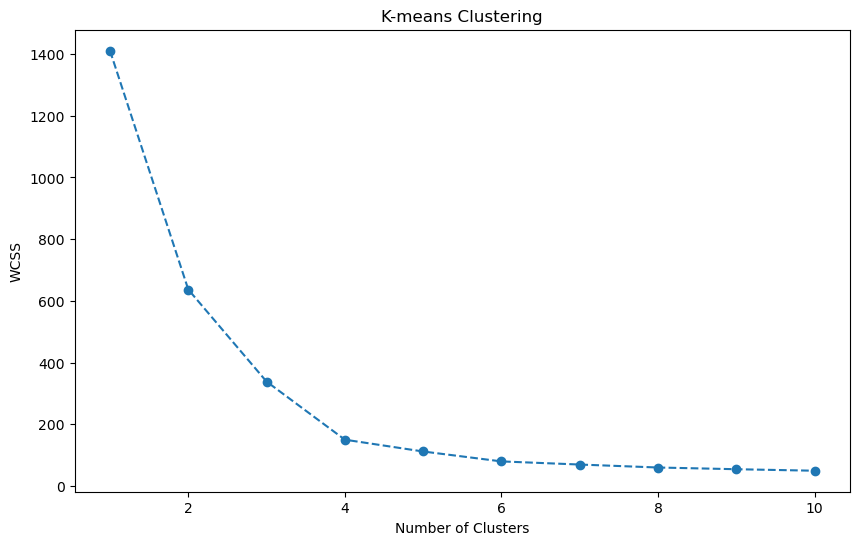

In [80]:
# plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [81]:
# kmeans with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(pca_data)

KMeans(n_clusters=4, random_state=42)

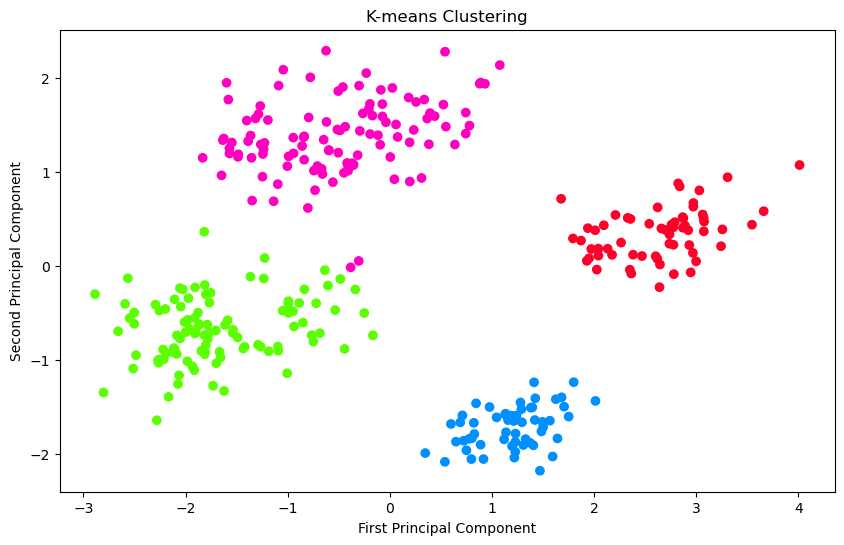

In [82]:
# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='gist_rainbow_r')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering')
plt.show()

In [83]:
from sklearn.metrics import silhouette_score

In [84]:
# compute the silhouette score
silhouette_score(pca_data, kmeans.labels_)
print(f"The silhouette score for K-means algorithm is: {silhouette_score(pca_data, kmeans.labels_):.2f}")

The silhouette score for K-means algorithm is: 0.66


In [85]:
from sklearn_extra.cluster import KMedoids

In [86]:
wcss = []   
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(pca_data)
    wcss.append(kmedoids.inertia_)

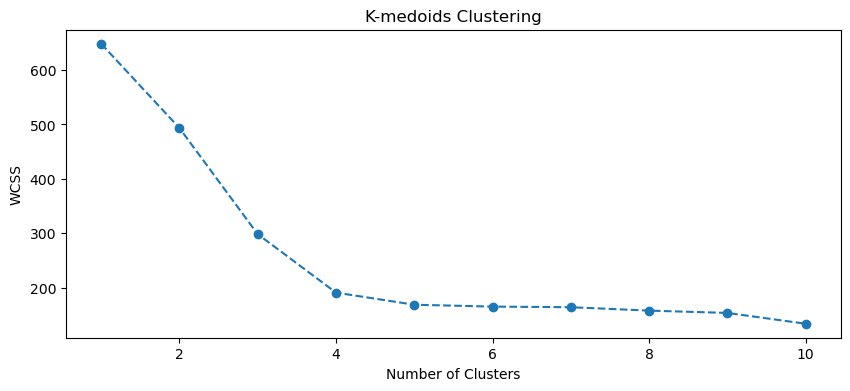

In [89]:
# plot the elbow method
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-medoids Clustering')
plt.show()

In [41]:
# kmedoids
kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(pca_data)

KMedoids(n_clusters=4, random_state=42)

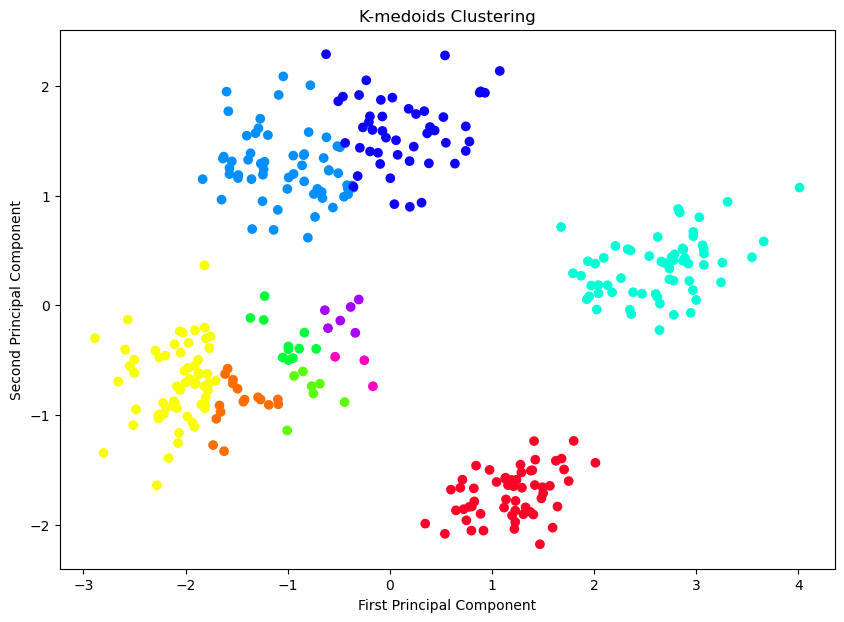

In [91]:
# plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, cmap='gist_rainbow_r')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-medoids Clustering')
plt.show()

In [43]:
# compute the silhouette score
silhouette_score(pca_data, kmedoids.labels_)
print(f"The silhouette score for K-medoids algorithm is: {silhouette_score(pca_data, kmedoids.labels_):.2f}")

The silhouette score for K-medoids algorithm is: 0.65


In [44]:
#hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

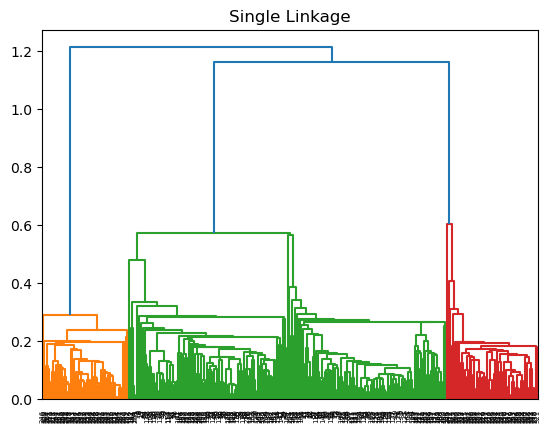

In [46]:
# single linkage

single_linkage = linkage(pca_data, method='single', metric='euclidean')
dendrogram(single_linkage)
plt.title('Single Linkage')
plt.show()

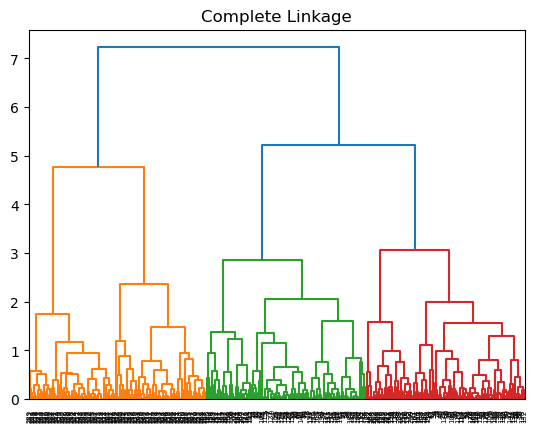

In [48]:
# complete linkage

complete_linkage = linkage(pca_data, method='complete', metric='euclidean')
dendrogram(complete_linkage)
plt.title('Complete Linkage')
plt.show()

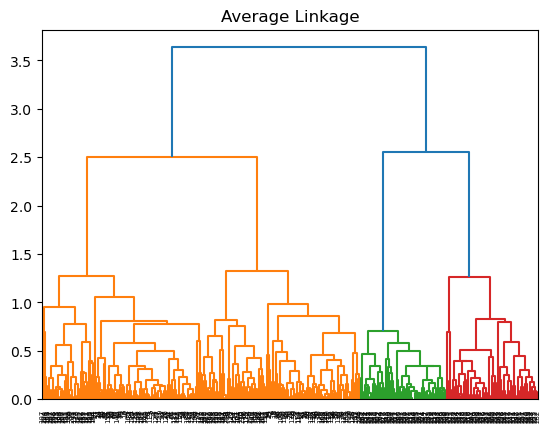

In [49]:
# average linkage

average_linkage = linkage(pca_data, method='average', metric='euclidean')
dendrogram(average_linkage)
plt.title('Average Linkage')
plt.show()

In [50]:
cluster_labels = pd.Series(cut_tree(average_linkage, n_clusters=4).reshape(-1,))

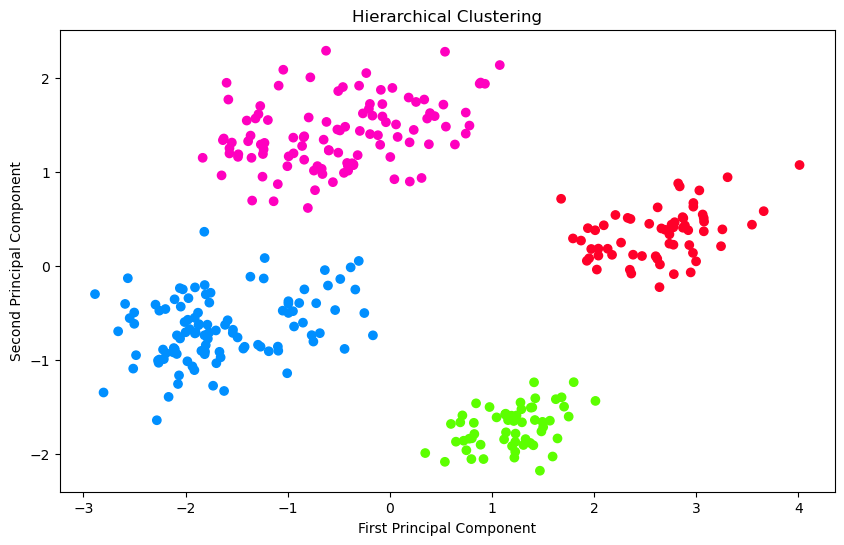

In [51]:
# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='gist_rainbow_r')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering')
plt.show()

In [52]:
# compute the silhouette score
silhouette_score(pca_data, cluster_labels)
print(f"The silhouette score for Hierarchical algorithm is: {silhouette_score(pca_data, cluster_labels):.2f}")

The silhouette score for Hierarchical algorithm is: 0.66
